# checking plot of pe For mY data And Podu data

In [31]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import ListedColormap, BoundaryNorm
from matplotlib.colorbar import ColorbarBase

In [32]:
df_ashraf=pd.read_csv('../data/input_pilot_data.csv')
df=df_ashraf.copy()
df.head()

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
0,3,A1 SH,SHRIMPLIN,2793.0,77.45,0.664,9.9,11.915,4.6,1,1.000
1,3,A1 SH,SHRIMPLIN,2793.5,78.26,0.661,14.2,12.565,4.1,1,0.979
2,3,A1 SH,SHRIMPLIN,2794.0,79.05,0.658,14.8,13.050,3.6,1,0.957
3,3,A1 SH,SHRIMPLIN,2794.5,86.10,0.655,13.9,13.115,3.5,1,0.936
4,3,A1 SH,SHRIMPLIN,2795.0,74.58,0.647,13.5,13.300,3.4,1,0.915


In [33]:
df.columns

Index(['Facies', 'Formation', 'Well Name', 'Depth', 'GR', 'ILD_log10',
       'DeltaPHI', 'PHIND', 'PE', 'NM_M', 'RELPOS'],
      dtype='object')

In [34]:

df_podu = pd.read_excel('../data/podu_data.xlsx')
df1 = df_podu.copy()
print(df1.head())


   Facies Formation    Well Name   Depth     GR  ILD_log10  DeltaPHI   PHIND  \
0       3     A1 SH  ALEXANDER D  2887.5  88.71      0.612       6.7  10.605   
1       3     A1 SH  ALEXANDER D  2888.0  92.71      0.583      11.0  12.515   
2       3     A1 SH  ALEXANDER D  2888.5  94.54      0.579      12.0  13.410   
3       3     A1 SH  ALEXANDER D  2889.0  95.31      0.579      11.5  13.750   
4       3     A1 SH  ALEXANDER D  2889.5  93.79      0.572      10.3  13.405   

         PE  NM_M  RELPOS       Vsh     NPHI     DPHI  Rho_ma     Rho_b  
0  4.193798     1   1.000  0.485976  0.13955  0.07255    2.72  2.602469  
1  4.050096     1   0.974  0.511767  0.18015  0.07015    2.72  2.606357  
2  4.008886     1   0.949  0.523567  0.19410  0.07410    2.72  2.599958  
3  3.928654     1   0.923  0.528532  0.19500  0.08000    2.72  2.590400  
4  3.928654     1   0.897  0.518731  0.18555  0.08255    2.72  2.586269  


In [35]:
df1.columns

Index(['Facies', 'Formation', 'Well Name', 'Depth', 'GR', 'ILD_log10',
       'DeltaPHI', 'PHIND', 'PE', 'NM_M', 'RELPOS', 'Vsh', 'NPHI', 'DPHI',
       'Rho_ma', 'Rho_b'],
      dtype='object')

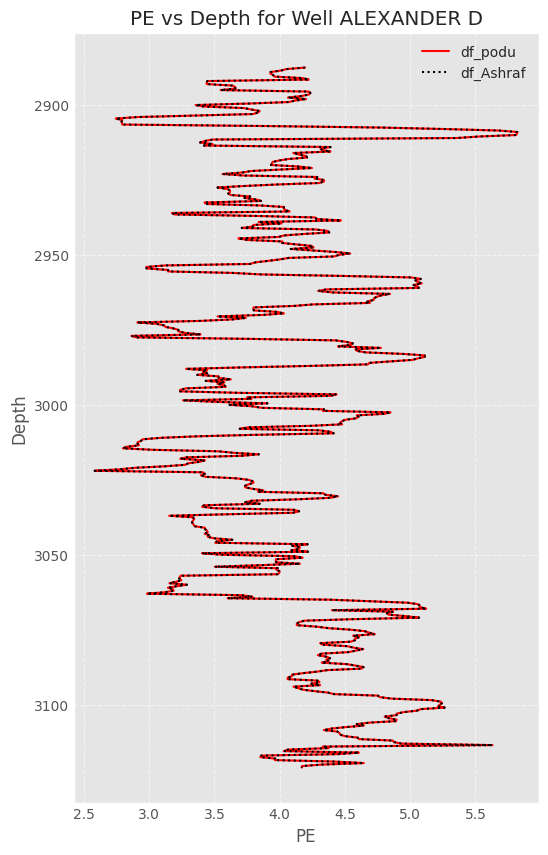

In [36]:
import matplotlib.pyplot as plt

# Filter well "ALEXANDER D" for both dataframes
well_name = "ALEXANDER D"
df_well_podu = df_podu[df_podu["Well Name"] == well_name]
df_well_1 = df1[df1["Well Name"] == well_name]

# Plot PE logs
plt.figure(figsize=(6, 10))
plt.plot(df_well_podu["PE"], df_well_podu["Depth"], label="df_podu", color="red")
plt.plot(df_well_1["PE"], df_well_1["Depth"], label="df_Ashraf", color="black", linestyle="dotted")

# Invert y-axis (depth increases downward)
plt.gca().invert_yaxis()

plt.xlabel("PE")
plt.ylabel("Depth")
plt.title(f"PE vs Depth for Well {well_name}")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


'KIMZEY A', 'Recruit F9'

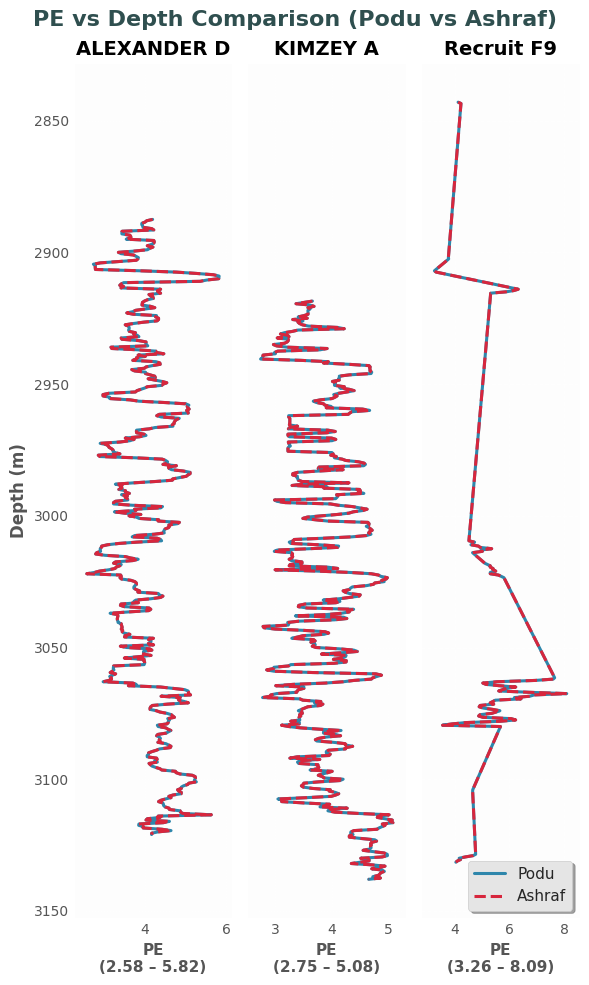

In [37]:
import matplotlib.pyplot as plt

# Use ggplot style
plt.style.use("ggplot")

# Wells to plot
wells_to_plot = ['ALEXANDER D', 'KIMZEY A', 'Recruit F9']

# Create subplots (one per well)
fig, axes = plt.subplots(nrows=1, ncols=len(wells_to_plot), figsize=(6, 10), sharey=True)

for ax, well in zip(axes, wells_to_plot):
    # Filter data
    df_well_podu = df_podu[df_podu["Well Name"] == well]
    df_well_ashraf = df1[df1["Well Name"] == well]

    # Plot PE logs
    ax.plot(df_well_podu["PE"], df_well_podu["Depth"], 
            label="Podu", color="#2E86AB", linewidth=2.2)
    ax.plot(df_well_ashraf["PE"], df_well_ashraf["Depth"], 
            label="Ashraf", color="#D7263D", linestyle="--", linewidth=2.2)

    # Invert depth axis
    ax.invert_yaxis()

    # Auto-scale X limits (padding 10%)
    xmin = min(df_well_podu["PE"].min(), df_well_ashraf["PE"].min())
    xmax = max(df_well_podu["PE"].max(), df_well_ashraf["PE"].max())
    pad = 0.1 * (xmax - xmin)
    ax.set_xlim(xmin - pad, xmax + pad)

    # Titles & labels
    ax.set_title(well, fontsize=14, fontweight="bold", color="black")
    ax.set_xlabel(f"PE\n({xmin:.2f} – {xmax:.2f})", fontsize=11, fontweight="bold")
    ax.grid(True, linestyle=":", alpha=0.7)
    ax.set_facecolor("#fdfdfd")

# Y-axis label only on first plot
axes[0].set_ylabel("Depth (m)", fontsize=12, fontweight="bold")

# Legend only once (last subplot)
axes[-1].legend(fontsize=11, loc="lower right", frameon=True, fancybox=True, shadow=True)

# Overall title
fig.suptitle("PE vs Depth Comparison (Podu vs Ashraf)", fontsize=16, fontweight="bold", color="darkslategray")

plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()
